<a href="https://colab.research.google.com/github/byui-cse/cse380-notebooks/blob/master/11_5_Wrapping_Up_Week_Eleven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wrapping Up Week Eleven
## Answer Selected Questions

## 1

My group and I were working on the prove, and we have solved the problem, but not efficiently enough. We were wondering if there is some pattern in the list of links that can be used to identify cliques and anticliques to help improve our time? (Also maybe a specific method on how to identify said patterns?)

### Answer

Some suggestions:

* Find someone who has taken (or is currently taking) CSE 381 Algorithms and Complexity and ask them for ideas.
* One idea is to use a much faster lookup than a linear search for a pair-of-nodes tuple in a long list of tuples-representing links.
* This will require modifying the ```read_graph``` function to return a better representation for a graph than a list of its links.
* Filter out pairs of nodes that are the same node twice in the Cartesian product of the nodes list with itself in ```check_clique_or_anti_clique```.
* Set the optional ```repeat``` keyword in ```product``` from ```itertools``` to 2 to get these pairs.

In [ ]:
from itertools import product
help(product)

## 2

You mentioned "generating functions" and said we might look at those. I'm curious, as my skimming of the [Wikipedia page](https://en.wikipedia.org/wiki/Generating_function) revealed to me a little about how useful they are. Would you care to comment?

### Answer

Okay, I'll bite.

First, recall one basic fact of exponentiation that underlies the usefulness of generating functions:

$$x^{a}x^{b} = x^{a+b}.$$

Now look at these facts:

If $$G(x) = \sum_{k=0}^{\infty} a_{k}x^{k}$$

then $$xG(x) = \sum_{k=0}^{\infty} a_{k}x^{k+1} = \sum_{k=1}^{\infty}a_{k-1}x^{k}$$

and $$x^{2}G(x) = \sum_{k=0}^{\infty} a_{k}x^{k+2} = \sum_{k=2}^{\infty}a_{k-2}x^{k},$$

etc.

Consider the example sequence $S_n = [0, 1, 3, 7, 15, \ldots]$. A recurrence relation for this sequence is $S_n = 2S_{n-1} + 1$ for $n > 0, S_0 = 0$.

Let's see if $s(n) = 2^{n} - 1$ is a closed-form formula for the $S_n$ sequence:

$$2^{n} - 1 = 2(2^{n-1} -1) + 1 \rightarrow 2^{n} - 1 = 2^{n-1+1} - 2 + 1 \rightarrow 2^{n} - 1 = 2^{n} - 2 + 1 \rightarrow 2^{n} - 1 = 2^{n} - 1.$$

Check.

Now let $G$ be the generating function for the $S_n$ sequence. Then
$$G = G_{0} + G_{1}x + G_{2}x^{2} + G_{3}x^{3} + \cdots.$$

Then, since $G_{0} = 0$ and $G_{n} = 2G_{n-1} + 1$ for $n \ge 1$:

$$\begin{array}{rcl}
     G & = & 0 + (2G_0 + 1)x + (2G_1 + 1)x^2 + (2G_2 + 1)x^3 + \cdots\\
       & = & 2G_{0} x + 1x + 2G_{1} x^2 + 1x^2 + 2G_{2} x^3 + 1x^3 + \cdots\\
       & = & 2x(G_{0} + G_{1} x + G_{2} x^2 + G_{3} x^3 + \cdots) + x + x^2 + x^3 + \cdots\\
       & = & 2xG + x(1 + x + x^2 + x^3 + \cdots)\\
   \end{array}$$
  
so that $G - 2xG = x(1 + x + x^{2} + x^{3} + \cdots),$ or
$G(1 - 2x) = x(1 + x + x^{2} + x^{3} + \cdots) = x/(1 - x),$
where the last equation follows from the easily-verifiable fact that

$$\sum_{i=0}^{\infty}x^{i} = \frac{1}{1 - x}.$$

Thus, by dividing both sides by $(1 - 2x)$:

$$G = \frac{x}{(1 - 2x)(1 - x)}.$$

We want to get a formula for the coefficients of $G$, but there's no easy way to do that without breaking the denominator into a sum!

So, recalling (!) how in calculus we integrated rational functions using partial fraction decomposition, we can rewrite the fraction on the right in the form $\frac{A}{1 - 2x} + \frac{B}{1 - x}$, where $A$ and $B$ are constants. This means
$$\frac{x}{(1 - 2x)(1 - x)} = \frac{A}{1 - 2x} + \frac{B}{1 - x} =
  \frac{A(1 - x) + B(1 - 2x)}{(1 - 2x)(1 - x)} =
  \frac{(A + B) + (-A -2B)x}{(1 - 2x)(1 - x)},$$
and therefore, by equating coefficients in the numerators, we get $A + B = 0$ and $-A - 2B = 1$. These two equations have the solution $A = 1$ and $B = -1$. Thus
$$G = \frac{x}{(1 - 2x)(1 - x)} = \frac{1}{1 - 2x} - \frac{1}{1 - x}.$$

But then the above easily-verifiable fact combined with another fairly-easily-verifiable (and similar) fact yield:

$$\begin{array}{rcl}
    G & = & 1/(1 - 2x) - 1/(1 - x)\\
      & = & (1 + 2x + 4x^2 + 8x^3 + \cdots) - (1 + x + x^2 + x^3 + \cdots)\\
      & = & (1 - 1) + (2 - 1)x + (4 - 1)x^2 + (8 - 1)x^3 + \cdots.\\
  \end{array}$$

Thus we see that $G_n$, the coefficient of $x^{n}$, is $2^{n} - 1$, which agrees with what we showed above.

The so-called [Theoretical Computer Science Cheat Sheet](https://www.tug.org/texshowcase/cheat.pdf) on page 2 gives the general method for solving recurrences using generating functions.




## Definitely Going Above and Beyond

Here is another (harder) example, following the steps in the "Cheat Sheet", giving a few more details of the process.

Solve the recurrence relation
$$a_{k} = 5a_{k-1} - 6a_{k-2},$$

with initial conditions
$$a_0 = 6\ \mbox{and}\ a_1 = 30.$$

Step 1, multiply both sides by $x^k$:
$$a_{k}x^k = 5a_{k-1}x^k - 6a_{k-2}x^k.$$

Step 2, sum (from $k=2$):
$$\sum_{k=2}^{\infty}a_{k}x^k = \sum_{k=2}^{\infty}5a_{k-1}x^k - \sum_{k=2}^{\infty}6a_{k-2}x^k.$$

Step 3, let $$G(x) = \sum_{k=0}^{\infty}a_kx^k.$$

Step 4, rewriting the equation in terms of the generating function $G(x)$ has lots of substeps!

First, add $a_0 + a_1x$ to both sides:
$$a_0 + a_1x + \sum_{k=2}^{\infty}a_{k}x^k = a_0 + a_1x +
\sum_{k=2}^{\infty}5a_{k-1}x^k - \sum_{k=2}^{\infty}6a_{k-2}x^k.$$

Simplify the left-hand side by "folding" it into one zero-based summation so it will look like $G(x)$:
$$\sum_{k=0}^{\infty}a_{k}x^k = a_0 + a_1x +
\sum_{k=2}^{\infty}5a_{k-1}x^k - \sum_{k=2}^{\infty}6a_{k-2}x^k.$$

Factor out the constants 5 and 6:
$$\sum_{k=0}^{\infty}a_{k}x^k = a_0 + a_1x +
5\sum_{k=2}^{\infty}a_{k-1}x^k - 6\sum_{k=2}^{\infty}a_{k-2}x^k.$$


Note that this last equation is *almost* in a form where we can replace the summations with the expressions in terms of $G(x)$ that we introduced earlier, namely:
$$G(x)=\sum_{k=0}^{\infty}a_kx^k, xG(x) = \sum_{k=1}^{\infty}a_{k - 1}x^k\ \mbox{and}\ x^2G(x) = \sum_{k=2}^{\infty}a_{k - 2}x^k.$$

To make it conform, we must adjust the first summation on the right-hand side, using the obvious (!) fact that
$$\sum_{k=2}^{\infty}a_{k - 1}x^k = \sum_{k=1}^{\infty}a_{k - 1}x^k - a_0x.$$

So now we have
$$\sum_{k=0}^{\infty}a_{k}x^k = a_0 + a_1x + 5\left(\sum_{k = 1}^{\infty}a_{k - 1}x^k - a_0x\right) - 6\sum_{k=2}^{\infty}a_{k - 2}x^k.$$

And after distributing the 5, we're pretty much ready:
$$\sum_{k=0}^{\infty}a_{k}x^k = a_0 + a_1x + 5\sum_{k=1}^{\infty}a_{k - 1}x^k - 5a_0x - 6\sum_{k=2}^{\infty}a_{k - 2}x^k.
$$

Wait! Here's where we can use our initial conditions, $a_0 = 6\ \mbox{and}\ a_1 = 30$:
$$\sum_{k=0}^{\infty}a_{k}x^k = 6 + 30x + 5\sum_{k=1}^{\infty}a_{k - 1}x^k - 5(6)x - 6\sum_{k=2}^{\infty}a_{k - 2}x^k.$$

Which, after noting that $5 \cdot 6 = 30$ (how convenient!) and rearranging gives us:
$$\sum_{k=0}^{\infty}a_{k}x^k = 5\sum_{k=1}^{\infty}a_{k - 1}x^k - 6\sum_{k=2}^{\infty}a_{k - 2}x^k + 6 + 30x - 30x.$$

Now we're ready for those substitutions:
$$G(x) = 5xG(x) - 6x^2G(x) + 6.$$

Move all the $G(x)$ terms to the left-hand side:
$$G(x) - 5xG(x) + 6x^2G(x) = 6.$$

Factor out $G(x)$:
$$G(x)(1 - 5x + 6x^2) = 6.$$

Factor the trinomial in parentheses, divide both sides by it, and we're *finally* ready for Step 5---solving for $G(x)$:
$$G(x) = \frac{6}{(1 - 3x)(1 - 2x)}.$$

First break up the denominator using partial fractions:
$$\frac{6}{(1 - 3x)(1 - 2x)} = \frac{A}{(1 - 3x)} + \frac{B}{(1 - 2x)},$$

$A$ and $B$ are constants we can solve for as follows:

Multiply through by the common denominator:
$$\frac{6}{(1 - 3x)(1 - 2x)} = \frac{A(1 - 2x) + B(1 - 3x)}{(1 - 3x)(1 - 2x)}.$$

Distribute the $A$ and $B$ on the left-hand side numerator:
$$A - 2Ax + B - 3Bx.$$

Regroup:
$$(A + B) + (-2A - 3B)x.$$

Noting that $6 = 6 + 0x$, we equate the numerators on both sides to get:
$$6 = (A + B)\ \mbox{and}\ 0 = (-2A - 3B).$$

From this it's easy to see that $A = 18$ and $B = -12.$ Thus
$$G(x) = \frac{18}{(1 - 3x)} + \frac{-12}{(1 - 2x)}.$$


Finally, using the (as mentioned in class, easily-verifiable) fact that
$$\sum_{k=0}^{\infty} a^{k}x^{k} = 1 + ax + a^{2}x^2 + a^{3}x^3 + \cdots = \frac{1}{1 - ax},$$

$$G(x) = \sum_{k = 0}^{\infty}(18 \cdot 3^k - 12 \cdot 2^k)x^k.$$

Thereby giving our closed-form formula for the original recurrence:
$$a_k = 18 \cdot 3^k - 12 \cdot 2^k.$$

It would be good for you to check this answer by computing the next term of the sequence from both the recurrence equation and the formula, to see if they both agree!  (So, what is $a_2$?)

### One More Time

This one also has some messy algebra, but please try to follow it:

Use generating functions to solve the (again, linear but **non-homogeneous**) recurrence relation
$$a_k = a_{k-1} + 2a_{k-2} + 2^k$$
with initial conditions $a_0 = 4$ and $a_1 = 12$.

Here's the solution:

Let
$$G(x) = \sum_{k=0}^{\infty}a_{k}x^k.$$

Then
$$xG(x) = \sum_{k=0}^{\infty}a_{k}x^{k+1} = \sum_{k=1}^{\infty}a_{k-1}x^k$$

(by changing the name of the variable from $k$ to $k+1$), and

$$x^2G(x) = \sum_{k=0}^{\infty}a_{k}x^{k+2} = \sum_{k=2}^{\infty}a_{k-2}x^k.$$

Thus

$$G(x) - xG(x) - 2x^2G(x) = \sum_{k=0}^{\infty}a_{k}x^k - \sum_{k=1}^{\infty}a_{k-1}x^k - \sum_{k=2}^{\infty}2a_{k-2}x^k$$
$$= a_0 + a_{1}x - a_{0}x + \sum_{k=2}^{\infty}2^k \cdot x^k$$

$$= 4 + 8x + \frac{1}{1 - 2x} - 1 - 2x = \frac{4 - 12x^2}{1 - 2x},$$

because of the given recurrence relation, the initial conditions, facts we've seen, and algebra.

Since the left-hand side of this equation factors as $G(x)(1 - 2x)(1 + x)$, divide through to get
$$G(x) = \frac{4 - 12x^2}{(1 + x)(1 - 2x)^2}.$$

This is where you can use partial fractions to break up the denominator. But you'll need *three* constants this time, because of the $x^2$ term. So, setting

$$\frac{4 - 12x^2}{(1 + x)(1 - 2x)^2} = \frac{A}{1 + x} + \frac{B}{1 - 2x} + \frac{C}{(1 - 2x)^2},$$

multiplying through by the common denominator, and equating coefficients, you'll find that $A = -8/9,
B = 38/9$, and $C = 2/3$. Thus

$$G(x) = \frac{-8/9}{1 + x} + \frac{38/9}{1 - 2x} + \frac{2/3}{(1 - 2x)^2} = \sum_{k=0}^{\infty}\left(-\frac{8}{9}(-1)^k + \frac{38}{9} \cdot 2^k + \frac{2}{3}(k + 1)2^k \right)x^k$$

Therefore $a_k = (-8/9)(-1)^k + (38/9)2^k + (2/3)(k + 1)2^k$.

So, again, please check correctness by computing the next few terms of the sequence from both the recurrence relation and this formula: $a_2 = 24$ (both ways), $a_3 = ?$, $a_4 = ?$, etc.

### Advanced Counting with Generating Functions

To accompany the "how many ways can you make change for a dollar" problem, here's another advanced counting problem involving comestibles instead of coins!

How many ways are there to choose a dozen cookies from three varieties --- chocolate chip, oatmeal and peanut butter --- if at least two cookies of each kind but no more than three oatmeal cookies are chosen?

Solution:

Use generating functions!

The factors in the generating function for choosing the chocolate chip and peanut butter cookies are both $(x^2 + x^3 + x^4 + \cdots)$ --- at least two of each --- and the factor for choosing the oatmeal cookies is $(x^2 + x^3)$ --- at least two but no more than three.

Therefore the generating function for this problem is the product of these factors:
$$(x^2 + x^3 + x^4 + \cdots)^2 \cdot (x^2 + x^3).$$

We want to find the coefficient of $x^{12}$, since we want 12 cookies.

This is equivalent to finding the coefficient of $x^6$ in
$$(1 + x + x^2 + x^3 + \cdots)^2 \cdot (1 + x).$$

(Why is that?)

Two facts, one you've seen already:
$$\sum_{k=0}^{\infty}x^k = 1 + x + x^2 + x^3 + \cdots = \frac{1}{(1-x)}.$$                
                 
and
$$\sum_{k=0}^{\infty}(k + 1)x^k = 1 + 2x + 3x^2 + 4x^3 + \cdots = \frac{1}{(1-x)^2}.$$

mean the function for our cookies problem is $(1 + x)/(1 - x)^2$, so we want the coefficient of $x^6$ in $1/(1 - x)^2$, which is 7, plus the coefficient of $x^5$ in $1/(1 - x)^2$, which is 6.

So the answer is $7 + 6 = 13$.

This can also be confirmed by [Wolfram Alpha](https://www.wolframalpha.com) if you enter:

```(x^2 + x^3)(x^2 + x^3 + x^4 + x^5 + x^6 + x^7 + x^8)^2```

as shown:

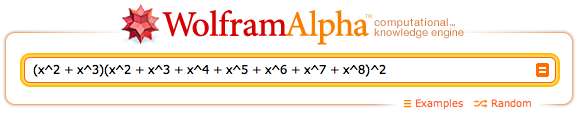

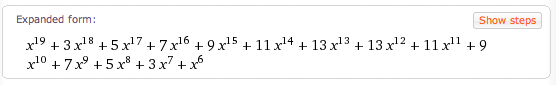

Again, it's the coefficient of $x^{12}$ we're looking for, which is 13.

The equivalent Python way to expand this product of polynomials is to use the ```sympy``` module:

In [ ]:
from sympy import Symbol, expand
x = Symbol('x')
((x**2 + x**3) * (x**2 + x**3 + x**4 + x**5 + x**6 + x**7 + x**8)**2).expand()

Try this with the equivalent product, as mentioned above, to see if the coefficient of $x^6$ is the same, namely 13:

In [3]:
from sympy import Symbol, expand
x = Symbol('x')
((1 + x) * (1 + x + x**2 + x**3 + x**4 + x**5 + x**6)**2).expand()

x**13 + 3*x**12 + 5*x**11 + 7*x**10 + 9*x**9 + 11*x**8 + 13*x**7 + 13*x**6 + 11*x**5 + 9*x**4 + 7*x**3 + 5*x**2 + 3*x + 1

#### Take a Step Back

Let's back up and come at this more systematically.

(WARNING: Don't read this on an empty stomach!)

Recall the key fact to remember when learning about generating functions:
$$x^ax^b = x^{a + b}$$

That means if $$S = \{a_0, a_1, a_2, a_3, \ldots\}$$

and $$T = \{b_0, b_1, b_2, b_3, \ldots\}$$

then there will be a contribution of $a_mb_n$ to the $(m + n)^{th}$
power of $x$ in the product of the generating functions for $S$ and
$T$.

For example:

Suppose you want to count the integer solutions to $a + b = 10$, but with $a$ and $b$ constrained by $1 \le a \le 6$ and $3 \le b \le 9$.

There are six possible solutions:
$$\begin{array}{lcl}
1 & + & 9\\
2 & + & 8\\
3 & + & 7\\
4 & + & 6\\
5 & + & 5\\
6 & + & 4
\end{array}$$

where the first number is $a$ and the second number is $b$.

If you construct the sequences $$A = \{0, 1, 1, 1, 1, 1, 1, 0, 0, \ldots\}$$

and $$B = \{0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, \ldots\}$$

where $a_k = 1$ if $k$ is a possible value of $a$ (and $a_k = 0$
otherwise) and ditto for $b_k$, then the product of the two generating
functions for $A$ and $B$ will have the total possible solutions
to $$a + b = 10$$ as the coefficient of $x^{10}$, which is
$$\sum_{k = 0}^{10}a_{k}b_{10 - k}.$$

$$= 0 + 1 + 1 + 1 + 1 + 1 + 1 + 0 + 0 + 0 = 6$$

which agrees with the number of solutions in the listing above.

Now recall the binomial expansion:

$$(1 + x)^{n} = {n \choose 0} + {n \choose 1}x + \cdots + {n \choose r}x^{r} + \cdots + {n \choose n}x^{n}.$$

Plug in $n = 5$ to concretize:
$$(1 + x)^5 = {5 \choose 0} + {5 \choose 1}x + {5 \choose 2}x^2 +  {5 \choose 3}x^3 +  {5 \choose 4}x^4 + {5 \choose 5}x^5$$
$$=1 + 5x + 10x^2 + 10x^3 + 5x^4 + x^5.$$

Note that in this expansion of $(1 + x)^5$ the coefficient of, say $x^3$, is the number of ways of choosing 3 objects from a set of 5 objects.

And in general, the coefficient of $x^r$ is the number of ways of choosing $r$ objects from a set of 5 objects.

Seen another way, this coefficient is just the number of ways of choosing the $x$ instead of the 1 from exactly $r$ factors of
$$(1 + x)(1 + x)(1 + x)(1 + x)(1 + x).$$

Say you're picking two pieces of fruit from a basket containing an apple, an orange, a peach, a pear, and a banana. How many ways can you do this?

Since you're choosing 2 from a set of 5, the number of ways is 10, the
coefficient of 2 in the expansion of $(1 + x)^5$ which, again, is
$$1 + 5x + 10x^2 + 10x^3 + 5x^4 + x^5.$$

Of course, remember that this expansion also gives the number of ways you can choose any other number of items.

Now replace $(1 + x)(1 + x)(1 + x)(1 + x)(1 + x)$ with

(0 apples + 1 apple)(0 oranges + 1 orange)(0 peaches + 1 peach)(0 pears + 1 pear)(0 bananas + 1 banana)

See the connection between choosing $r$ fruits and the coefficient of $x^r$ in the $(1 + x)^5$ polynomial?

Suppose you replace the peach with an apple. If you consider the two apples to be identical, how many ways can you choose two items now?

Here's a polynomial similar to the one above:

$$\begin{array}{cccc}
(1 + x + x^2) & (1 + x) & (1 + x) & (1 + x) \\
{\bf apple}  & {\bf orange} & {\bf pear} & {\bf banana}\\
\end{array}$$

Again, it may help to concretize this as above:

(0 apples + 1 apple + 2 apples)(0 oranges + 1 orange)\\(0 pears + 1 pear)(0 bananas + 1 banana)

You may choose 0, 1 or 2 apples and 0 or 1 oranges, pears and bananas, for a total of two items.
The number of ways of doing this is exactly the coefficient of $x^2$ in this new polynomial.

By multiplying it out:

$$(1 + x + x^2)(1 + x)(1 + x)(1 + x) = 1 + 4x + 7x^2 + 7x^3 + 4x^4 + x^5$$

you can see that the number of ways is 7. As a check, list all 7 of them in a table:
$$\begin{array}{llllllll}
                & 1 & 2 & {\bf 3} & 4 & 5 & 6 & 7\\ \hline
\#\ \mbox{of}\ apples    & 2 & 1 & {\bf 1} & 1 & 0 & 0 & 0\\
\#\ \mbox{of}\ oranges   & 0 & 1 & {\bf 0} & 0 & 1 & 1 & 0\\
\#\ \mbox{of}\ pears     & 0 & 0 & {\bf 1} & 0 & 1 & 0 & 1\\
\#\ \mbox{of}\ bananas   & 0 & 0 & {\bf 0} & 1 & 0 & 1 & 1\\
\end{array}$$





Here column **3** corresponds to forming $x^2$ by choosing $x$ from the first factor, 1 from the second factor, $x$ from the third factor and $1$ from the fourth factor.

Of course this new expression tells much more. It says that you can choose **no** item in 1 way, one item in 4 ways, two items in 7 ways, three items in 4 ways, etc.

Note that distinguishable items (say, an orange and a pear) give rise to different factors, whereas indistinguishable items (the two apples) are included in the same factor.

To generalize the above examples, consider an infinite sequence $a_0, a_1, a_2, \ldots$ where for some integer $n$ every term after the $n^{th}$ is zero.

So $a_{n + 1} = a_{n + 2} = \cdots = 0$.

Again, **define** the generating function for this sequence to be the polynomial
$$a_0 + a_1x + a_2x^2 + a_3x^3 + \cdots + a_nx^n.$$

#### Now Take It Up a Notch

Suppose each of $r$ people wants to order a donut from a bakery.

Unfortunately, the bakery only has 3 chocolate, 2 glazed and 4 raspberry donuts left!

Let $d_r$ be the sequence for the number of fillable orders for the $r$ donuts.

What is a generating function for the $d_r$ sequence?

In particular, what is $d_7$?

Solution:

The generating function is

$$\begin{array}{ccc}
(1 + x + x^2 + x^3) & (1 + x + x^2) & (1 + x + x^2 + x^3 + x^4)\\
{\bf chocolate}  & {\bf glazed} & {\bf raspberry}\\
\end{array}$$

since orders can only be filled for 0-3 chocolate donuts, 0-2 glazed donuts, and 0-4 raspberry donuts,
for a total of $r$ donuts.  It is fitting that this is a polynomial of degree 9 (multiply it out)
since the bakery only has 9 donuts! So clearly, $d_r = 0$ for $r > 9$.

As for $d_7$, multiplying the polynomial out gives
$$1 + 3x + 6x^2 + 9x^3 + 11x^4 + 11x^5 + 9x^6 + 6x^7 + 3x^8 + x^9$$
so there are exactly 6 fillable orders for the 7 donuts.  Let's check:

$$\begin{array}{lllllll}
                       & 1 & 2 & 3 & {\bf 4} & 5 & 6\\ \hline
\#\ \mbox{of chocolate donuts} & 3 & 3 & 3 & {\bf 2} & 2 & 1\\
\#\ \mbox{of glazed donuts}    & 2 & 1 & 0 & {\bf 2} & 1 & 2\\
\#\ \mbox{of raspberry donuts} & 2 & 3 & 4 & {\bf 3} & 4 & 4\\
\end{array}$$

Here column **4** corresponds to forming $x^7$ by choosing $x^2$ from the first factor, $x^2$ from the second factor, and $x^3$ from the third factor.

Now suppose that raspberry donuts only come two to a box, and so the bakery will only sell them in multiples of two. Then the generating function for the number of fillable orders for $r$ donuts becomes

$$\begin{array}{ccc}
(1 + x + x^2 + x^3) & (1 + x + x^2) & (1 + x^2 + x^4)\\
{\bf chocolate}  & {\bf glazed} & {\bf raspberry}\\
\end{array}$$

since only 0, 2 or 4 raspberry donuts can be had. Multiplying this out gives
$$1 + 2x + 4x^2 + 5x^3 + 6x^4 + 6x^5 + 5x^6 + 4x^7 + 2x^8 + x^9$$

Since the coefficient of $x^7$ is 4, for example, there are 4 ways to order 7 donuts with the new restriction. These are shown in columns 1, 3, 5 and 6 in the above table.

In the above example, at most 9 donuts could be ordered. What if the number of choices were effectively infinite? It doesn't matter that this is not a realistic scenario, just **suppose** that the supply of glazed donuts has become unlimited. But there are still only 3 chocolate and 4 raspberry donuts available, and the raspberry donuts must still be bought two at a time.  Is there still a generating function for the number of ways of buying $r$ donuts?

Of course! Since any number of donuts can be supplied, the thing to do is to replace the **glazed** (middle) factor in

$$\begin{array}{ccc}
(1 + x + x^2 + x^3) & (1 + x + x^2) & (1 + x^2 + x^4)\\
{\bf chocolate}  & {\bf glazed} & {\bf raspberry}\\
\end{array}$$

with $$(1 + x + x^2 + x^3 + \cdots)$$

where the powers of $x$ go on increasing forever.

Remember, there really is no problem with this expression, even though it suggests
that you'll be adding up infinitely many quantities!

No problem, that is, as long as you never try to substitute a specific number for $x$!

In other words, *there is no issue of convergence here!* We treat the expression in a **formal** way, combining it with similar expressions using the usual rules for adding and multiplying polynomials.

As [Herbert Wilf](https://en.wikipedia.org/wiki/Generating_function#Definitions) so illustratively put it, the variable $x$ and its powers form a **clothesline** where we can hang things in an orderly manner, where hanging means assigning a *position* to each *coefficient*.  The order is imposed by the increasing powers of $x$.

This is powerful!  Especially because we can use closed-form expressions that *collapse* the generating functions of certain sequences to allow formal symbol manipulation (algebra) to solve a huge variety of counting problems.  If the series converges, these closed-form expressions can compute some function of $x$, but right now we're not interested in computations, just in combinations!

For example, we could combine (add) $$(1 + 2x + 5x^3) + (1 + x + x^2 + x^3 + \ldots)$$

$$\begin{array}{rrrrrrrrrrr}
 & = & (1 + 1) & + & (2 + 1)x  & + & (0 + 1)x^2 & + & (5 + 1)x^3 & + & (0 + 1)x^4 + \ldots\\
 & = &    2    & + &       3x  & + &        x^2 & + &       6x^3 & + &       x^4 + \ldots
\end{array}$$

and we could combine (multiply) $$(x^0 + x^1 + x^2 + x^3)(x^0 + x^1 + x^2 + x^3 + \ldots)$$

$$\begin{array}{rrrrrrrrrrrrrrrrr}
 & = & x^0 & (x^0 & + & x^1 & +   & x^2 & +   & x^3  & + & x^4  & + & x^5 & + & x^6 + \ldots)\\
 & + & x^1 & (x^0 & + & x^1 & +   & x^2 & +   & x^3  & + & x^4  & + & x^5 & + & x^6 + \ldots)\\
 & + & x^2 & (x^0 & + & x^1 & +   & x^2 & +   & x^3  & + & x^4  & + & x^5 & + & x^6 + \ldots)\\
 & + & x^3 & (x^0 & + & x^1 & +   & x^2 & +   & x^3  & + & x^4  & + & x^5 & + & x^6 + \ldots)\\
 &   &     &      &   &     &     &     &     &      &   &      &   &     &   & \\
 & = & 1   &      & + & x   & +   & x^2 & +   & x^3  & + & x^4  & + & x^5 & + & x^6 + \ldots\\
 &   &     &      & + & x   & +   & x^2 & +   & x^3  & + & x^4  & + & x^5 & + & x^6 + \ldots\\
 &   &     &      &   &     & +   & x^2 & +   & x^3  & + & x^4  & + & x^5 & + & x^6 + \ldots\\
 &   &     &      &   &     &     &     & +   & x^3  & + & x^4  & + & x^5 & + & x^6 + \ldots\\
 &   &     &      &   &     &     &     &     &      &   &      &   &     &   & \\
 & = & 1   &      & + & 2x  & +   & 3x^2 & +  & 4x^3 & + & 4x^4 & + & 4x^5 & + & 4x^6 + \ldots
\end{array}$$

Going back to the example of an infinite number of glazed donuts, recall the generating function for the sequence $d_r$:
$$\begin{array}{ccc}
(1 + x + x^2 + x^3) & (1 + x + x^2 + x^3 + \cdots) & (1 + x^2 + x^4)\\
{\bf chocolate}  & {\bf glazed} & {\bf raspberry}\\
\end{array}$$

We have already multiplied out the first two factors. Combining this product with the third factor gives
$$\begin{array}{rrrrrrrrrrrrrrrrrrr}
 &   & (1 & + & 2x & + & 3x^2 & + & 4x^3  & + & 4x^4  & + & 4x^5 & + & 4x^6 & + &\ldots) &   &\\
 &   & (1 & + & x^2& + &  x^4)&   &       &   &       &   &      &   &      &   &        &   &\\
 &   &    &   &    &   &      &   &       &   &       &   &      &   &      &   &        &   &\\
 & = & (1 & + & 2x & + & 3x^2 & + & 4x^3  & + & 4x^4  & + & 4x^5 & + & 4x^6 & + &\ldots) & 1 & +\\
 &   & (1 & + & 2x & + & 3x^2 & + & 4x^3  & + & 4x^4  & + & 4x^5 & + & 4x^6 & + &\ldots) &x^2& +\\
 &   & (1 & + & 2x & + & 3x^2 & + & 4x^3  & + & 4x^4  & + & 4x^5 & + & 4x^6 & + &\ldots) &x^4& +\\
 &   &    &   &    &   &      &   &       &   &       &   &      &   &      &   &        &   &\\
 & = & 1  & + & 2x & + & 3x^2 & + & 4x^3  & + & 4x^4  & + & 4x^5 & + & 4x^6 & + & 4x^7   & + &\ldots\\
 &   &    &   &    & + &  x^2 & + & 2x^3  & + & 3x^4  & + & 4x^5 & + & 4x^6 & + & 4x^7   & + &\ldots\\
 &   &    &   &    &   &      &   &       & + &  x^4  & + & 2x^5 & + & 3x^6 & + & 4x^7   & + &\ldots\\
 &   &    &   &    &   &      &   &       &   &       &   &      &   &      &   &        &   &\\
 & = & 1  & + & 2x & + & 4x^2 & + & 6x^3  & + & 8x^4  & + &10x^5 & + &11x^6 & + &12x^7   & + &\ldots\\
\end{array}$$

where for $r \ge 7$ the coefficient of $x^r$ is always 12. In particular, there are now 12 ways of choosing 7 donuts, since the coefficient of $x^7$ is 12. Here they are:

$$\begin{array}{rrrrrrrrrrrrr}
                       & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10& 11& 12\\ \hline
\#\ \mbox{of chocolate donuts} & 0 & 0 & 0 & 1 & 1 & 1 & 2 & 2 & 2 & 3 & 3 & 3\\
\#\ \mbox{of glazed donuts}    & 3 & 5 & 7 & 2 & 4 & 6 & 1 & 3 & 5 & 0 & 2 & 4\\
\#\ \mbox{of raspberry donuts} & 4 & 2 & 0 & 4 & 2 & 0 & 4 & 2 & 0 & 4 & 2 & 0\\
\end{array}$$

Finally, in light of this example, we should extend the definition of a generating function given above to be an expression of the form
$$a_0 + a_1x + a_2x^2 + a_3x^3 + \cdots$$

where **infinitely many** of the coefficients $a_r$ are allowed to be nonzero. Such an expression is called a **formal power series**, and is usually abbreviated $\sum_{k=0}^{\infty}a_{k}x^{k}$ and expressed as a function of $x$, as we've seen:
$$G(x) = \sum_{k=0}^{\infty}a_{k}x^{k}.$$

##### A Couple of Exercises For You to Try

Use this table for reference:

| No. | Generating function $G(x)$  | $a_k$ in $\sum_{k=0}^{\infty} a_{k}x^k$                      |
|-----|-----------------------------|-----------------------------|
|  1  | $\frac{1 - x^{n+1}}{1 - x}$ | 1 if $k \le n$; 0 otherwise |
|  2  | $\frac{1}{1 - x^d}$         | 1 if $d \mid k$; 0 otherwise|
|  3  | $\frac{1}{1 - ax}$          | $a^k$                       |
|  4  | $\frac{1}{(1 - x)^2}$       | $k + 1$                     |
|  5  | $(1 + x)^n$                 | ${n \choose k}$             |
|  6  | $\frac{1}{(1 - x)^n}$       | ${n + k - 1 \choose k}$     |

###### 1

How many ways can you fill a bag with $n$ fruits subject to the following constraints?

* The number of apples must be even.
* The number of bananas must be a multiple of 5.
* There can be at most 4 oranges.
* There can be at most 1 pear.

For example, there are 7 ways to fill a bag with 6 fruits:

|         | 1 | 2 | 3 | 4 | 5 | 6 | 7 |
|---------|---|---|---|---|---|---|---|
| Apples  | 6 | 4 | 4 | 2 | 2 | 0 | 0 |
| Bananas | 0 | 0 | 0 | 0 | 0 | 5 | 5 |
| Oranges | 0 | 2 | 1 | 4 | 3 | 1 | 0 |
| Pears   | 0 | 0 | 1 | 0 | 1 | 0 | 1 |

Specifically, answer the question with $n = 15$, i.e., how many ways can you fill a bag with 15 fruits subject to the constraints?

Hint: If you make the correct matching between type of fruit and the generating function used to count it, you'll be well on your way!

a. Apple

b. Banana

c. Orange

d. Pear

1. $1 + x^5 + x^{10} + x^{15} + \cdots$
2. $1 + x^2 + x^4 + \cdots$
3. $1 + x$
4. $1 + x + x^2 + x^3 + x^4$

###### 2

This is a multiple choice question:

$G(x) = \frac{1 + x}{(1 - x)^3}$ is the generating function for which sequence?

Hint: Decompose $G(x)$ into the sum of two functions and see the reference table above.

a. $1, 1, 1, 1, 1, \ldots$

b. $0, 1, 4, 9, 16, \ldots$

c. $1, 2, 3, 4, 5, \ldots$

d. $1, 4, 9, 16, 25, \ldots$
